<a href="https://colab.research.google.com/github/manasakaradi5/AD-Assignments/blob/main/generative%20ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
# Input Layer input_img
# Encoder
input_img = Input (shape=(784,))
encoded = Dense (64, activation= 'relu') (input_img)
decoded = Dense (784, activation='sigmoid') (encoded)

autoencoder = Model (input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3446 - val_loss: 0.1614
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1521 - val_loss: 0.1264
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1226 - val_loss: 0.1085
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1067 - val_loss: 0.0981
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0967 - val_loss: 0.0904
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0899 - val_loss: 0.0851
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0852 - val_loss: 0.0816
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0819 - val_loss: 0.0791
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0795 - val_loss: 0.0774
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0780 - val_loss: 0.0763
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0768 - val_loss: 0.0754
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


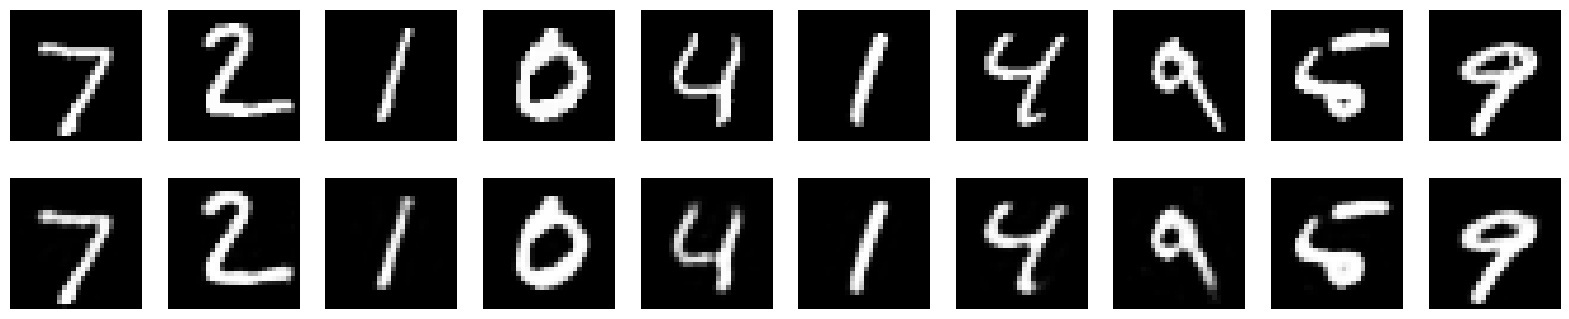

In [4]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()
